In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
from pathlib import Path

from wikipedia_cleanup.data_filter import KeepAttributesDataFilter, generate_default_filters
from wikipedia_cleanup.predict import TrainAndPredictFramework
from wikipedia_cleanup.predictor import ZeroPredictor, OnePredictor, MeanPredictor, RandomPredictor
from wikipedia_cleanup.property_correlation import PropertyCorrelationPredictor
from wikipedia_cleanup.random_forest import RandomForestPredictor

import pandas as pd

In [3]:
model = RandomForestPredictor(use_cache=False, padding=False, classify=True)
framework = TrainAndPredictFramework(model, group_key=['infobox_key', 'property_name'])

In [4]:
framework.data = pd.read_csv('../data/popular_data_with_features.csv')[:100000]

In [5]:
framework.data["value_valid_from"] = pd.to_datetime(framework.data["value_valid_from"]).dt.tz_localize(None)

In [6]:
group_key=['infobox_key', 'property_name']
framework.data["key"] = list(
            zip(*[framework.data[group_key] for group_key in framework.group_key])
        )

In [7]:
relevant_cols = framework.predictor.get_relevant_attributes()

Remove features to see if they are important

In [8]:
framework.fit_model()

Start training.


  0%|          | 0/11617 [00:00<?, ?it/s]

Finished training. Time elapsed: 0:01:04.100060


In [9]:
print(framework.test_model(randomize=False, predict_subset=1))

  0%|          | 0/11841 [00:00<?, ?it/s]

Starting evaluation.
Finished evaluation. Time elapsed: 0:00:01.230406
day 			changes 	no changes 
Precision:		0.0499 		0.9986
Recall:			0.0251 		0.9993
F1score:		0.0334 		0.9989
Changes of Data:	0.145%, 	Total: 6257
Changes of Pred:	0.073%, 	Total: 3148

week 			changes 	no changes 
Precision:		0.1285 		0.9914
Recall:			0.0594 		0.9963
F1score:		0.0813 		0.9939
Changes of Data:	0.907%, 	Total: 5689
Changes of Pred:	0.419%, 	Total: 2631

month 			changes 	no changes 
Precision:		0.1571 		0.9701
Recall:			0.0667 		0.9883
F1score:		0.0936 		0.9792
Changes of Data:	3.157%, 	Total: 4859
Changes of Pred:	1.340%, 	Total: 2062

year 			changes 	no changes 
Precision:		0.4220 		0.7662
Recall:			0.1418 		0.9354
F1score:		0.2123 		0.8424
Changes of Data:	24.956%, 	Total: 2955
Changes of Pred:	8.386%, 	Total: 993


Using Regressor with all features:

    daily: 0.0041
    
    weekly: 0.0325
    
    monthly: 0.0864
    
    yearly: 0.4429


Without mean_change_frequency_all_previous:

    daily: 0.0000
    
    weekly: 0.0277
    
    monthly: 0.1044
    
    yearly: 0.4476
    
Without mean_change_frequency_last_3 mean_change_frequency_all_previous:

    daily: 0.0079
    
    weekly: 0.0231
    
    monthly: 0.0866 
    
    yearly: 0.4387 
    
Without mean_change_frequency_last_3, mean_change_frequency_all_previous, days_since_last_change:

    daily: 0.0041
    
    weekly: 0.0327
    
    monthly: 0.1004
    
    yearly: 0.4527 


Without mean_change_frequency_last_3, mean_change_frequency_all_previous, days_since_last_change, days_since_last_2_changes:

    daily: 0.0000
    
    weekly: 0.0294 
    
    monthly: 0.1463
    
    yearly: 0.4690 
    
Without mean_change_frequency_last_3, mean_change_frequency_all_previous, days_since_last_change, days_since_last_2_changes, days_since_last_3_changes:

    daily: 0.0000
    
    weekly: 0.0235 
    
    monthly: 0.0837
    
    yearly: 0.4694 
    
    
Without mean_change_frequency_last_3, mean_change_frequency_all_previous, days_since_last_change, days_since_last_2_changes, days_since_last_3_changes, days_between_last_and_2nd_to_last_change:

    daily: 0.0000
    
    weekly: 0.0251
    
    monthly: 0.1034
    
    yearly: 0.4818

Precisions with all features:

    daily: 0.0368
    
    weekly: 0.0658
    
    monthly: 0.1371
    
    yearly: 0.4699
    
All experiments on (classification w/o padding) and balanced class_weights
Precisions with all features and balanced class_weights:

    daily: 0.0300
    
    weekly: 0.0720 
    
    monthly: 0.1268
    
    yearly: 0.4831
    
Precisions without mean_change_frequency_all_previous:

    daily: 0.0265 
    
    weekly: 0.0636 
    
    monthly: 0.1198
    
    yearly: 0.4938
    
Precisions without mean_change_frequency_all_previous:

    daily: 0.0259
    
    weekly: 0.0649  
    
    monthly: 0.1289
    
    yearly: 0.4302
    
Precisions without day_of_year:

    daily: 0.0466
    
    weekly: 0.0643  
    
    monthly: 0.1465
    
    yearly: 0.4667
    
Precisions without day_of_month:

    daily: 0.0325
    
    weekly: 0.0729  
    
    monthly: 0.1289
    
    yearly: 0.4725
    
Precisions without day_of_week:

    daily: 0.0455
    
    weekly: 0.0751 
    
    monthly: 0.1208 
    
    yearly: 0.4681
    
Precisions without month_of_year:

    daily: 0.0355
    
    weekly: 0.0809  
    
    monthly: 0.1474  
    
    yearly: 0.4588
    
Precisions without quarter_of_year:

    daily: 0.0405
    
    weekly: 0.0576 	
    
    monthly: 0.1359   
    
    yearly: 0.5057
    
Precisions without is_month_start:

    daily: 0.0284 
    
    weekly: 0.0723 	
    
    monthly: 0.1244   
    
    yearly: 0.4943 
    
    
Precisions without is_month_end:

    daily: 0.0348 
    
    weekly: 0.0664 	
    
    monthly: 0.1047   
    
    yearly: 0.4524 
    
    
Precisions without is_quarter_start:

    daily: 0.0261 
    
    weekly: 0.0504 
    
    monthly: 0.1071   
    
    yearly: 0.4643
    
Precisions without is_quarter_end:

    daily: 0.0199
    
    weekly: 0.0506
    
    monthly: 0.1244   
    
    yearly: 0.4634
    
Precisions without days_since_last_change:

    daily: 0.0230
    
    weekly: 0.0647
    
    monthly: 0.1244   
    
    yearly: 0.4767

## Feature Selection

Removing low variance features

In [10]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel

In [15]:
all_cols = relevant_cols[1:]

In [16]:
all_cols.remove('days_until_next_change')

In [24]:
all_cols

['day_of_year',
 'day_of_month',
 'day_of_week',
 'month_of_year',
 'quarter_of_year',
 'is_month_start',
 'is_month_end',
 'is_quarter_start',
 'is_quarter_end',
 'days_since_last_change',
 'days_since_last_2_changes',
 'days_since_last_3_changes',
 'days_between_last_and_2nd_to_last_change',
 'mean_change_frequency_all_previous',
 'mean_change_frequency_last_3']

In [32]:
framework.data[all_cols].iloc[1]

day_of_year                                   150
day_of_month                                   30
day_of_week                                     1
month_of_year                                   5
quarter_of_year                                 2
is_month_start                              False
is_month_end                                False
is_quarter_start                            False
is_quarter_end                              False
days_since_last_change                        135
days_since_last_2_changes                       0
days_since_last_3_changes                       0
days_between_last_and_2nd_to_last_change        0
mean_change_frequency_all_previous            135
mean_change_frequency_last_3                    0
Name: 1, dtype: object

In [11]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

In [26]:
trimmed_data = sel.fit_transform(framework.data[all_cols])

In [34]:
trimmed_data.shape

(100000, 11)

In [35]:
trimmed_data[0]

array([15, 15, 6, 1, 1, 0, 0, 0, 0, 0.0, 0.0], dtype=object)

The columns is_month_start, is_month_end, is_quarter_start, is_quarter_end are thrown out because of very low variance and should therefore be removed from the training data.

## Recursive feature elimination

In [37]:
model = framework.predictor

In [38]:
test_clf = model.classifiers[('27792315-0', 'genre')]

In [270]:
for clf in model.classifiers:
    sfm = SelectFromModel(clf, prefit=True, threshold=0.10)

{('27792315-0',
  'genre'): RandomForestClassifier(max_leaf_nodes=16, n_estimators=10, n_jobs=1,
                        random_state=0),
 ('27792315-0',
  'misc'): RandomForestClassifier(max_leaf_nodes=16, n_estimators=10, n_jobs=1,
                        random_state=0),
 ('27792315-0',
  'released'): RandomForestClassifier(max_leaf_nodes=16, n_estimators=10, n_jobs=1,
                        random_state=0),
 ('27792315-0',
  'reviews'): RandomForestClassifier(max_leaf_nodes=16, n_estimators=10, n_jobs=1,
                        random_state=0),
 ('293551596-0',
  'name'): RandomForestClassifier(max_leaf_nodes=16, n_estimators=10, n_jobs=1,
                        random_state=0),
 ('304542950-0',
  'name'): RandomForestClassifier(max_leaf_nodes=16, n_estimators=10, n_jobs=1,
                        random_state=0),
 ('34143546-0',
  'genre'): RandomForestClassifier(max_leaf_nodes=16, n_estimators=10, n_jobs=1,
                        random_state=0),
 ('34143546-0',
  'image'): Ra

In [40]:
from sklearn.feature_selection import RFE

In [41]:
rfe = RFE(estimator=test_clf, n_features_to_select=1, step=1)
rfe.fit(framework.data[all_cols], framework.data['days_until_next_change'])
ranking = rfe.ranking_

In [46]:
all_cols

['day_of_year',
 'day_of_month',
 'day_of_week',
 'month_of_year',
 'quarter_of_year',
 'is_month_start',
 'is_month_end',
 'is_quarter_start',
 'is_quarter_end',
 'days_since_last_change',
 'days_since_last_2_changes',
 'days_since_last_3_changes',
 'days_between_last_and_2nd_to_last_change',
 'mean_change_frequency_all_previous',
 'mean_change_frequency_last_3']

In [45]:
ranking

array([ 2,  4,  9, 10, 11, 13, 12, 15, 14,  5,  3,  8,  7,  1,  6])

In [53]:
ranked_list = list(zip(ranking, all_cols))
ranked_list.sort(key=lambda y: y[0])
ranked_list

[(1, 'mean_change_frequency_all_previous'),
 (2, 'day_of_year'),
 (3, 'days_since_last_2_changes'),
 (4, 'day_of_month'),
 (5, 'days_since_last_change'),
 (6, 'mean_change_frequency_last_3'),
 (7, 'days_between_last_and_2nd_to_last_change'),
 (8, 'days_since_last_3_changes'),
 (9, 'day_of_week'),
 (10, 'month_of_year'),
 (11, 'quarter_of_year'),
 (12, 'is_month_end'),
 (13, 'is_month_start'),
 (14, 'is_quarter_end'),
 (15, 'is_quarter_start')]

In [43]:
import matplotlib.pyplot as plt

In [258]:
test_clf.n_features_in_

4

In [259]:
sfm = SelectFromModel(test_clf, prefit=True, threshold=0.10)

In [260]:
sfm.get_support()

array([ True, False,  True,  True])

In [261]:
for feature_list_index in sfm.get_support(indices=True):
    print(all_cols[feature_list_index])

day_of_year
day_of_week
month_of_year


In [262]:
test_clf.feature_importances_.ravel()

array([0.36666667, 0.06      , 0.13333333, 0.44      ])

In [53]:
test_select.get_support()

array([False,  True,  True,  True,  True, False, False, False, False,
        True,  True, False, False,  True, False])

In [71]:
selected_feat = all_cols[(test_select.get_support())]

In [72]:
selected_feat

Index(['day_of_month', 'day_of_week', 'month_of_year', 'quarter_of_year',
       'days_since_last_change', 'days_since_last_2_changes',
       'mean_change_frequency_all_previous'],
      dtype='object')

In [84]:
test_clf.feature_importances_.ravel()

array([0.06464646, 0.15286195, 0.08484848, 0.08754209, 0.08956229,
       0.03299663, 0.        , 0.        , 0.        , 0.1037037 ,
       0.08282828, 0.02558923, 0.06397306, 0.14882155, 0.06262626])

In [89]:
import matplotlib.pyplot as plt

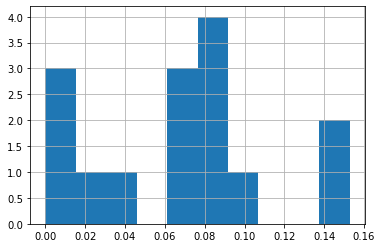

In [90]:
pd.Series(test_clf.feature_importances_.ravel()).hist()
plt.show()